# In this file:

* Basic data analysis
* Feature enginiring
* Feature selection
* models testing
* creating best models
* basic NN classifier
* saving data for visualizations and modeling

In [104]:
import pprint
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

from sklearn.model_selection import train_test_split
# Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
# Clasification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, accuracy_score
# Best_searches
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# Standarization
from sklearn.preprocessing import StandardScaler

from keras import models
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, precision_score, accuracy_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import numpy as np

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score, precision_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn import tree, ensemble, naive_bayes, neighbors, semi_supervised, discriminant_analysis, svm, linear_model, neural_network

In [105]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import pandas as pd
import numpy as np
import arrow
pd.set_option('display.max_columns', None)

In [106]:
file_path = '../data/Chess_data_basic.csv'

In [107]:
df = pd.read_csv(file_path, index_col = "Unnamed: 0")

In [108]:
df.head(2)

,id,rated,variant,speed,createdAt,lastMoveAt,status,winner,moves,clock,movesperplayer,white_player_name,white_ranking,black_player_name,black_ranking
0,O83cQxfo,True,standard,blitz,2023-06-28 02:33:43.673000+02:00,2023-06-28 02:44:00.722000+02:00,outoftime,white,e4 e5 Nf3 Nc6 Bc4 Nf6 d4 exd4 e5 d5 exd6 Qxd6 ...,300,70,EvilSaintPL,1753,Leosammie,1735
1,KeBcqcHz,True,standard,blitz,2023-06-28 02:31:45.081000+02:00,2023-06-28 02:33:30.178000+02:00,resign,white,Nf3 Nc6 g3 e5 Bg2 e4 Ng1 d5 d3 f5 dxe4 fxe4 Nc...,300,18,convict-19,1801,EvilSaintPL,1758


## Here data is readed, now its time for basic analysis

In [109]:
len(set(df["black_player_name"]+df["white_player_name"]))

4789

In [110]:
df.isna().sum()

id                     0
rated                  0
variant                0
speed                  0
createdAt              0
lastMoveAt             0
status                 0
winner               250
moves                  1
clock                  0
movesperplayer         0
white_player_name      0
white_ranking          0
black_player_name      0
black_ranking          0
dtype: int64

In [111]:
df[df["moves"].isna()]

,id,rated,variant,speed,createdAt,lastMoveAt,status,winner,moves,clock,movesperplayer,white_player_name,white_ranking,black_player_name,black_ranking
2723,8aopWTpz,True,standard,bullet,2020-11-12 17:19:50.287000+01:00,2020-11-12 17:19:50.287000+01:00,resign,white,NaN,60,0,asev123,1139,EvilSaintPL,1319


### Nan value exist in winner and moves columns 
Nan in winner means game ended in draw \
in Moves column Nan mean game ended without any move played so its not important for analysis or modeling


In [112]:
df.dropna(subset=['moves'],inplace=True) # delating nan values
df["winner"] = df["winner"].fillna("draw") # changing 

In [113]:
df.describe(include="all")

,id,rated,variant,speed,createdAt,lastMoveAt,status,winner,moves,clock,movesperplayer,white_player_name,white_ranking,black_player_name,black_ranking
count,5363,5363,5363,5363,5363,5363,5363,5363,5363,5363.000000,5363.000000,5363,5363.000000,5363,5363.000000
unique,5363,2,1,4,5363,5363,6,3,5356,NaN,NaN,2377,NaN,2413,NaN
top,O83cQxfo,True,standard,blitz,2023-06-28 02:33:43.673000+02:00,2023-06-28 02:44:00.722000+02:00,resign,white,d4 d5,NaN,NaN,EvilSaintPL,NaN,EvilSaintPL,NaN
freq,1,4912,5363,3748,1,1,2858,2625,2,NaN,NaN,2709,NaN,2654,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,301.868357,30.544844,NaN,1464.105538,NaN,1461.914787
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,492.720788,16.140272,NaN,222.531762,NaN,221.066990
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,0.000000,NaN,0.000000,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.000000,19.000000,NaN,1332.000000,NaN,1328.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.000000,28.000000,NaN,1470.000000,NaN,1467.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.000000,39.000000,NaN,1609.000000,NaN,1607.000000


Data to clear:

* movesperplayer >=2 -> one of players left game before 3 moves per player, its not posible to define game is lostbefore 3-4 moves per player plyed (if one side is not intentionaly losing game)
* white_ranking	or black_ranking == 0 -> enemy are "unknown", fortuntly all that games are not ranked, so wont be used in analysis or predictions

In [114]:
df = df[df["rated"]==True]

df = df[df["movesperplayer"]>2]

## Handling time values

In [115]:
def convert_date_with_offset(date_str):
    return arrow.get(date_str).datetime

for i in ['createdAt', 'lastMoveAt']:
    df[i] = df[i].apply(convert_date_with_offset)

# Feature Enginiring

### in this step we want to get information that might be important for predictions or might have some value for analysis

### another very important think for me is to analysis game for my perspetive of view, so the columns should be more like -> my ranking / enemy ranking / if i played as white or as black and so on 

### firstly duration of game and time used per one move

In [116]:
# Create Gametime column
df["Gametime"] = df["lastMoveAt"] - df["createdAt"]
# Handle Gametime column
df['Gametime'] = pd.to_timedelta(df['Gametime'])

rounding = lambda x: round(x, 1)

df['Gametime'] = df['Gametime'].dt.total_seconds().apply(rounding)
df['timepermove']=(df['Gametime']/df["movesperplayer"]).apply(rounding)

### next think to do is taking insight from moves column, there is a lot of possibility but i will concentrate on:

* cheking for long or short castle ( for both sides )
* taking number of moves before castle devided by 100  ( if no castle - values set to 1 ) ( for both sides )
* groping by opening (for this project i will take in count only first 4 moves - 2 moves per side )

### another import features:
* classifing for my win, enemy win and draw
* adding rank difference column


## Checking for side castle 

kingside castle ( short ) is O-O in moves notation and queenside castle ( long ) is O-O-O

In [117]:
def moves_column(df):
    df["moves"] = df["moves"].str.split(" ")
    df["white_moves"]=df["moves"].apply(lambda x: x[::2])
    df["black_moves"]=df["moves"].apply(lambda x: x[1::2])
    return df

df = moves_column(df)

In [118]:
def castle( df ):
    color_list = []
    my_short = []
    my_long = []
    enemy_short = []
    enemy_long = []
    
    
    for index, row in df.iterrows():
        if df["white_player_name"][index]=="EvilSaintPL":
            color_list.append(1)
        else:
            color_list.append(0)
        
        if df["white_player_name"][index]=="EvilSaintPL" and ("O-O" in df["white_moves"][index]):
            my_short.append(1)
            my_long.append(0)
        elif df["white_player_name"][index]=="EvilSaintPL" and ("O-O-O" in df["white_moves"][index]):
            my_long.append(1)
            my_short.append(0)
        elif df["black_player_name"][index]=="EvilSaintPL" and ("O-O" in df["black_moves"][index]):
            my_short.append(1)
            my_long.append(0)
        elif df["black_player_name"][index]=="EvilSaintPL" and ("O-O-O" in df["black_moves"][index]):
            my_long.append(1)
            my_short.append(0)
        else:
            my_long.append(0)
            my_short.append(0)
        
        if df["white_player_name"][index]!="EvilSaintPL" and ("O-O" in df["white_moves"][index]):
            enemy_short.append(1)
            enemy_long.append(0)
        elif df["white_player_name"][index]!="EvilSaintPL" and ("O-O-O" in df["white_moves"][index]):
            enemy_long.append(1)
            enemy_short.append(0)
        elif df["black_player_name"][index]!="EvilSaintPL" and ("O-O" in df["black_moves"][index]):
            enemy_short.append(1)
            enemy_long.append(0)
        elif df["black_player_name"][index]!="EvilSaintPL" and ("O-O-O" in df["black_moves"][index]):
            enemy_long.append(1)
            enemy_short.append(0)
        else:
            enemy_long.append(0)
            enemy_short.append(0)        
        
    df["my_kingcastle"]=my_short
    df["my_queencastle"]=my_long
    df["enemy_kingcastle"]=enemy_short
    df["enemy_queencastle"]=enemy_long
    df["my_color"]=color_list
    return df
        
df = castle(df)

In [119]:
pd.options.mode.chained_assignment = None

## num of moves before castle 

In [120]:
def find_index_of_first_occurrence(lst):
    elements = ["O-O", "O-O-O"]
    for element in elements:
        if element in lst:
            return lst.index(element)
    return len(lst) + 1

In [121]:
def moves_before_castle( df ):
    df["White_moves_before_castle"] = df["white_moves"].apply(find_index_of_first_occurrence)
    df["Black_moves_before_castle"] = df["black_moves"].apply(find_index_of_first_occurrence)
    
    my_moves_before = []
    enemy_moves_before = []
    
    for index, row in df.iterrows():
        if df["my_color"][index]==1:
            my_moves_before.append(df["White_moves_before_castle"][index])
            enemy_moves_before.append(df["Black_moves_before_castle"][index])
        else:
            my_moves_before.append(df["Black_moves_before_castle"][index])
            enemy_moves_before.append(df["White_moves_before_castle"][index])
            
    df["my_moves_before_castle"] = my_moves_before
    df["enemy_moves_before_castle"]= enemy_moves_before
    
    for index, row in df.iterrows():
        if df["my_moves_before_castle"][index]>(df["movesperplayer"][index]):
            df["my_moves_before_castle"][index]=100
        elif df["enemy_moves_before_castle"][index]>(df["movesperplayer"][index]):
            df["enemy_moves_before_castle"][index]=100
    
    df["my_moves_before_castle"] = df["my_moves_before_castle"]/(100)
    df["enemy_moves_before_castle"] = df["enemy_moves_before_castle"]/(100)
    
    return df

df=moves_before_castle( df )

## Grouping by opening

In [122]:
df["open4"] = df["moves"].apply(lambda x: x[:4])
df["open4"] = df["open4"].apply(lambda x: " ".join(x))

In [123]:
white_opens = df[df['white_player_name'] == 'EvilSaintPL']["open4"].value_counts().head(20)
black_opens = df[df['black_player_name'] == 'EvilSaintPL']["open4"].value_counts().head(20)

In [124]:
def iterable_opening_list_and_my_ranking( df ):
    
    openings_list = []
    rank_of_evilsaintpl_list = []
    evilsaintpl_won = []
    enemy_rank_list = []
    
    for index, row in df.iterrows():
        
        # OPENS1
        if df["white_player_name"][index]=="EvilSaintPL" and df["open4"][index] in white_opens.index:
            openings_list.append("White " + df["open4"][index])
        elif  df["white_player_name"][index]!="EvilSaintPL" and df["open4"][index] in black_opens.index:
            openings_list.append("Black " + df["open4"][index]) 
        else:
            openings_list.append("no opens")
        
        # MY RANK AND ENEMY RANK 
        if df["white_player_name"][index]=="EvilSaintPL":
            rank_of_evilsaintpl_list.append(df["white_ranking"][index])
            enemy_rank_list.append(df["black_ranking"][index])
        elif df["black_player_name"][index]=="EvilSaintPL":
            rank_of_evilsaintpl_list.append(df["black_ranking"][index])
            enemy_rank_list.append(df["white_ranking"][index])
        else:
            print(index)
            
        # I WON 
        if df["winner"][index] == 'draw':
            evilsaintpl_won.append(0)
        elif df["white_player_name"][index]=="EvilSaintPL" and df["winner"][index]=='white':
            evilsaintpl_won.append(1)
        elif  df["black_player_name"][index]=="EvilSaintPL" and df["winner"][index]=='black':
            evilsaintpl_won.append(1)
        else:
            evilsaintpl_won.append(-1)
            
        

    df["opens1"]= openings_list
    df["my_rank"]= rank_of_evilsaintpl_list
    df['i_won'] = evilsaintpl_won
    df['enemy_rank'] = enemy_rank_list
    
    # NEW RANKS FE
    df['rank_difference'] = df['my_rank'] - df['enemy_rank']

    return df

df = iterable_opening_list_and_my_ranking(df)

On that stage I want to take data for tableu wizualisations

created visuals here -> https://public.tableau.com/views/Chess_Analysis/Story1?:language=en-GB&publish=yes&:display_count=n&:origin=viz_share_link

and here https://public.tableau.com/views/Book2_16890080408260/Dashboard1?:language=en-GB&:display_count=n&:origin=viz_share_link

quick desription of viasuls in Readme

In [125]:
dfwiz = df.copy()

## Another data cleaning and onehot encoding for openings

In [126]:
def clear_dataframe(df):
    temp = pd.get_dummies(df["opens1"])
    df = pd.concat([df,temp], axis=1)
    
    df.drop("status",axis=1, inplace=True)
    df.drop(labels = ["opens1", "id"], axis=1, inplace=True)
    df = df[df["white_player_name"]!="YoungCapitan"]
    df = df[df["black_player_name"]!="YoungCapitan"]
    df.drop("variant",axis=1,inplace=True)
    
    return df

df = clear_dataframe(df)

In [127]:
df["i_won"]=df["i_won"]+1

In [128]:
df.shape

(4862, 71)

In [129]:
df.speed.unique()

array(['blitz', 'classical', 'bullet', 'rapid'], dtype=object)

### adding column for rank gained or losed by game ( not used for predictions ) and sorting by speed

In [130]:
def rankdifftest(df):
    
    blitz = df[df["speed"]=="blitz"].reset_index(drop=True)
    classical = df[df["speed"]=="classical"].reset_index(drop=True)
    bullet = df[df["speed"]=="bullet"].reset_index(drop=True)
    rapid = df[df["speed"]=="rapid"].reset_index(drop=True)
    
    for speed in [blitz, classical, bullet, rapid]:
        rank_resu=list()
        for index, row in speed.iterrows():
            if index==0:
                rank_resu.append(speed["my_rank"][index])
            else:
                rank_resu.append(speed["my_rank"][index-1])
        speed["rank_after_game"]=rank_resu
        speed["my_rank_diff"]=speed["rank_after_game"]-speed["my_rank"]
    return pd.concat([blitz, classical, bullet, rapid])
df = rankdifftest(df)

### taking from data only columns that may be usfull for predictions

In [131]:
model_columns = [ 'i_won','my_color','my_rank','rank_difference', 'movesperplayer', 'Gametime', 'timepermove','my_kingcastle', 'my_queencastle',
       'enemy_kingcastle', 'enemy_queencastle',
       'my_moves_before_castle', 'enemy_moves_before_castle', 'no opens','Black d4 Nf6 Bf4 e6', 'Black d4 Nf6 Nf3 e6', 'Black d4 Nf6 c4 e6',
       'Black d4 d5 Bf4 Nf6', 'Black d4 d5 Nf3 Nf6', 'Black d4 d5 c4 c6',
       'Black e4 e5 Bc4 Nc6', 'Black e4 e5 Bc4 Nf6', 'Black e4 e5 Nc3 Nf6',
       'Black e4 e5 Nf3 Nc6', 'Black e4 e5 Nf3 Nf6', 'Black e4 e5 d4 exd4',
       'Black e4 e5 f4 d5', 'Black e4 e5 f4 exf4', 'Black e4 e6 Bc4 d5',
       'Black e4 e6 Nc3 d5', 'Black e4 e6 Nf3 d5', 'Black e4 e6 d4 d5',
       'Black e4 e6 e5 c5', 'Black g3 e5 Bg2 Nf6', 'White e4 c5 Nf3 Nc6',
       'White e4 c5 Nf3 d6', 'White e4 c5 Nf3 e6', 'White e4 c6 Nf3 d5',
       'White e4 c6 d4 d5', 'White e4 d5 Nf3 dxe4', 'White e4 d5 exd5 Nf6',
       'White e4 d5 exd5 Qxd5', 'White e4 e5 Nc3 Nc6', 'White e4 e5 Nc3 Nf6',
       'White e4 e5 Nc3 d6', 'White e4 e5 Nf3 Bc5', 'White e4 e5 Nf3 Nc6',
       'White e4 e5 Nf3 Nf6', 'White e4 e5 Nf3 Qf6', 'White e4 e5 Nf3 d5',
       'White e4 e5 Nf3 d6', 'White e4 e6 Nf3 d5', 'White e4 e6 d4 d5',
       'White e4 g6 d4 Bg7']

In [132]:
cols_without_openings= ['i_won','my_color','my_rank','enemy_rank' ,'rank_difference', 'movesperplayer', 'Gametime', 'timepermove','my_kingcastle', 'my_queencastle',
       'enemy_kingcastle', 'enemy_queencastle',
       'my_moves_before_castle', 'enemy_moves_before_castle']

## Feature selection

feature selestion should be different for different models, tree based models are more telerant for colerated columns, while colerated columns in linear models are huge problem \
also some of openings columns may be very important for tree based models while useless for linear models and thats why i dont want to use 'sklearn.SelectFromModel' to keep only important features \
 thats the main resons why i will handle feature selection on my own, without sklearn tools or  Featurewiz for example


because of high coleration I want to delete enemy_rank column ( because its highly colerated with my_ranking ),
I will keep movesperplayer and gametime ( even if their are colerated ) because i think they maight be important for different speeds

<Axes: >

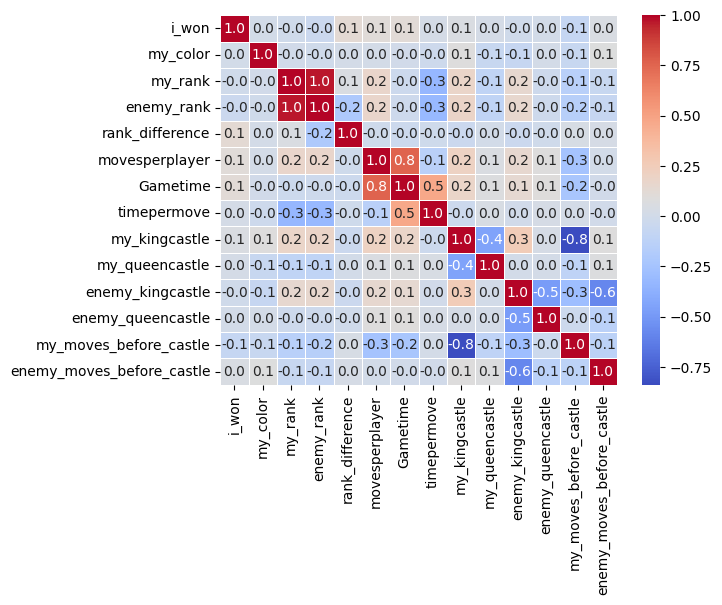

In [134]:
sns.heatmap(df[df["speed"]=="blitz"][cols_without_openings].corr(), annot=True, cmap='coolwarm', fmt='.1f', linewidths=0.5)

In [95]:
df.drop(["enemy_rank"], axis=1, inplace=True)

### grouping data by speed

Goal of dividing games by speed is to check how predictive would be model trained on different speed and tested on other.

Realy important think to keep in mind is number of games in different speeds, for example classical games should be worse for prediction than bullet because number of classical speed games is lower, another think is that I played classical games in begining of my chess carrer when I was much worse player

Before grouping, data should be scaled

For this project I chose minmaxclaser because for most of features thare are no outliers, and most of distributions are gaussian (similar to gaussian)

In [ ]:
scaler = MinMaxScaler()
df = scaler.fit_transform(df[model_columns].drop("i_won",axis=1))

In [96]:
final_all = df[model_columns]

blitz = df[df["speed"]=="blitz"][model_columns]

classical = df[df["speed"]=="classical"][model_columns]

bullet = df[df["speed"]=="bullet"][model_columns]

rapid = df[df["speed"]=="rapid"][model_columns]

In [97]:
print(f"blitz : {blitz.shape},\nclassic: {classical.shape},\nbullet: {bullet.shape},\nrapid: {rapid.shape},\nfull: {final_all.shape}")

blitz : (3402, 54),
classic: (153, 54),
bullet: (972, 54),
rapid: (335, 54),
full: (4862, 54)


In [98]:
blitz.head(2)

,i_won,my_color,my_rank,rank_difference,movesperplayer,Gametime,timepermove,my_kingcastle,my_queencastle,enemy_kingcastle,enemy_queencastle,my_moves_before_castle,enemy_moves_before_castle,no opens,Black d4 Nf6 Bf4 e6,Black d4 Nf6 Nf3 e6,Black d4 Nf6 c4 e6,Black d4 d5 Bf4 Nf6,Black d4 d5 Nf3 Nf6,Black d4 d5 c4 c6,Black e4 e5 Bc4 Nc6,Black e4 e5 Bc4 Nf6,Black e4 e5 Nc3 Nf6,Black e4 e5 Nf3 Nc6,Black e4 e5 Nf3 Nf6,Black e4 e5 d4 exd4,Black e4 e5 f4 d5,Black e4 e5 f4 exf4,Black e4 e6 Bc4 d5,Black e4 e6 Nc3 d5,Black e4 e6 Nf3 d5,Black e4 e6 d4 d5,Black e4 e6 e5 c5,Black g3 e5 Bg2 Nf6,White e4 c5 Nf3 Nc6,White e4 c5 Nf3 d6,White e4 c5 Nf3 e6,White e4 c6 Nf3 d5,White e4 c6 d4 d5,White e4 d5 Nf3 dxe4,White e4 d5 exd5 Nf6,White e4 d5 exd5 Qxd5,White e4 e5 Nc3 Nc6,White e4 e5 Nc3 Nf6,White e4 e5 Nc3 d6,White e4 e5 Nf3 Bc5,White e4 e5 Nf3 Nc6,White e4 e5 Nf3 Nf6,White e4 e5 Nf3 Qf6,White e4 e5 Nf3 d5,White e4 e5 Nf3 d6,White e4 e6 Nf3 d5,White e4 e6 d4 d5,White e4 g6 d4 Bg7
0,2,1,1753,18,70,617.0,8.8,1,0,0,0,0.06,1.00,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,0,0,1758,-43,18,105.1,5.8,0,1,1,0,0.14,0.17,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# column definiton

* i_won - 0 -> I lost, 1-Draw, 2-I_Won
* my_color - 1 -> white , 0 -> black
* gametime - duration of game in sec.
* timepermove -> Gametime / movesperplayer
* no opens - no specyfic opening typed played by me


# models

In [35]:
# Train = pd.concat([blitz, bullet])
# Test = pd.concat([rapid])

# X = Train.drop("i_won", axis=1)
# y = Train["i_won"]

# X_F = Test.drop(["i_won"], axis=1)
# y_F = Test["i_won"]

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn import tree, ensemble, naive_bayes, neighbors, semi_supervised, discriminant_analysis, svm, linear_model, neural_network

Here I write function to test different models to see what kind of models are important to test with parameters in future

In [38]:
def basic_models_test(X_train, X_test, y_train, y_test):
    """
    Function to test some classifiers, without any parameters
    """
    # chose models to test
    models=[
    naive_bayes.BernoulliNB(),
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    ensemble.ExtraTreesClassifier(),
    naive_bayes.GaussianNB(),
    semi_supervised.LabelPropagation(),
    semi_supervised.LabelSpreading(),
    discriminant_analysis.LinearDiscriminantAnalysis(),
    svm.LinearSVC(multi_class="crammer_singer"),
    linear_model.LogisticRegression(multi_class="multinomial", max_iter=1000),
    linear_model.LogisticRegressionCV(multi_class="multinomial", max_iter=1000),
    neural_network.MLPClassifier(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),
    ensemble.RandomForestClassifier(),
    linear_model.RidgeClassifier(),
    linear_model.RidgeClassifierCV(),
    ]
    # create results dicts to fill in future
    result = dict()
    results2 = dict()
    
    for model in models:
        # Fit and predict results for model
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred2 = model.predict(X_F)
        # Calculate the evaluation metrics and save them to results
        result[str(model)]= f"f1_score: {round(f1_score(y_test, y_pred, average='weighted'), 4)}, precision_score: {round(precision_score(y_test, y_pred, average='weighted'), 4)}, accuracy_score: {round(accuracy_score(y_test, y_pred), 4)}"
        results2[str(model)]=f"TEST SCORE:f1_score: {round(f1_score(y_F, y_pred2, average='weighted'), 4)}, precision_score: {round(precision_score(y_F, y_pred2, average='weighted'), 4)}, accuracy_score: {round(accuracy_score(y_F, y_pred2), 4)}"
    return result, results2
    
    

Function to test a model with different Test/Train folds and also to test model on other speed

In [4]:
def model_test(model, X, y, X_test_F, y_test_F, n=5):
    """ model <- model to test,
        X, y <- X, y to train and test
        X_test. y_test <- diff data for testing only
        n <- num. of folds
    """
    Train_res = list()
    Test_res = list()
    Final_test = list()
    AVG = dict()
    
    for i in range(n):
        # create a copy of model and chose a fold to test
        test_model = model
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = i)
        # fit and predict result with model
        test_model.fit(X_train, y_train)
        y_pred_test = test_model.predict(X_test)
        y_pred_train = test_model.predict(X_train)
        # save evaluation metrics of that fold
        Train_res.append(f1_score(y_train, y_pred_train, average='weighted'))
        Test_res.append(f1_score(y_test, y_pred_test, average='weighted'))
    # same as in loop but only to train and test on chossen data
    test_model = model
    test_model.fit(X, y)
    y_pred_F = test_model.predict(X_test_F)
    Final_test.append(f1_score(y_test_F, y_pred_F, average='weighted'))   
        
    AVG["Train"]=sum(Train_res)/n
    AVG["Test"]=sum(Test_res)/n
    AVG["Test_Final"]=sum(Final_test)
    return AVG

Function to plot a confusion matrix of predictions

In [40]:
def plot_confusion_matrix(y_true, y_pred, classes):
    """
    y_true -> true value of predicted values
    y_pred -> value estimated by model
    classes -> names of predicted classes
    """
    cm = confusion_matrix(y_true, y_pred)
    tick_marks = np.arange(len(classes))
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=classes, yticklabels=classes)
    plt.xticks(tick_marks + 0.5, classes)
    plt.yticks(tick_marks + 0.5, classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

In [97]:
basic_models_test(X_train, X_test, y_train, y_test)

D:\LichessData\venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\LichessData\venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\LichessData\venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\LichessData\venv\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` 

({'BernoulliNB()': 'f1_score: 0.4722, precision_score: 0.4656, accuracy_score: 0.4923',
  'DecisionTreeClassifier()': 'f1_score: 0.4943, precision_score: 0.4945, accuracy_score: 0.4941',
  'ExtraTreeClassifier()': 'f1_score: 0.5056, precision_score: 0.5063, accuracy_score: 0.505',
  'ExtraTreesClassifier()': 'f1_score: 0.5012, precision_score: 0.5053, accuracy_score: 0.5096',
  'GaussianNB()': 'f1_score: 0.0691, precision_score: 0.5127, accuracy_score: 0.0802',
  'LabelPropagation()': 'f1_score: 0.5134, precision_score: 0.5135, accuracy_score: 0.5205',
  'LabelSpreading()': 'f1_score: 0.5083, precision_score: 0.5059, accuracy_score: 0.5169',
  'LinearDiscriminantAnalysis()': 'f1_score: 0.5454, precision_score: 0.549, accuracy_score: 0.5479',
  "LinearSVC(multi_class='crammer_singer')": 'f1_score: 0.5222, precision_score: 0.5597, accuracy_score: 0.5378',
  "LogisticRegression(max_iter=1000, multi_class='multinomial')": 'f1_score: 0.5452, precision_score: 0.5509, accuracy_score: 0.557',


Next think I want to do is to test few best looking in "basic_models_test" models with randomized search, and spot best of the best models

In [53]:
classifiers = {
    'XGBoost': {
        'model': XGBClassifier(),
        'param_dist': {
            'max_depth': np.arange(3, 10),
            'learning_rate': [0.1, 0.01, 0.001],
            'n_estimators': [100, 200, 300, 500],
            'gamma': [0, 0.1, 0.2],
            'subsample': [0.8, 1.0],
            'colsample_bytree': [0.8, 1.0]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'param_dist': {
            'n_estimators': np.arange(100, 601, 100),
            'max_depth': np.arange(1, 71, 7),
            'min_samples_leaf': np.arange(2, 71, 7),
            'min_samples_split': np.arange(2, 71, 7),
            'max_features': ['sqrt', 'log2']
        }
    },
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=10000),
        'param_dist': {
            'C': [0.1, 1.0, 10.0],
            'penalty': ['l2', None]
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_dist': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance']
        }
    },
    'SVM': {
        'model': SVC(),
        'param_dist': {
            'C': [0.1, 1.0, 10.0],
            'kernel': ['linear', 'rbf', 'sigmoid']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'param_dist': {
            'criterion': ['gini', 'entropy'],
            'max_depth': [5, 10, 15],
            'min_samples_leaf': [1, 5, 10],
            'min_samples_split': [2, 5, 10],
            'max_features': ['sqrt', 'log2']
        }
    },
    'Naive Bayes': {
        'model': GaussianNB(),
        'param_dist': {
            
        }
    },
}

In [54]:
dataframes_names_str = ["blitz", "classical", "bullet", "rapid", "all_data"]

all_dataframes = [blitz, classical, bullet, rapid, final_all]

def model_for_different_gamemodes_extended():
    final_results = {}
    for dataframe, dataframe_name in zip(all_dataframes, dataframes_names_str):
        
        X = dataframe.drop("i_won", axis=1)
        y = dataframe['i_won']
        # Define the parameter grid for grid search
        
        scaler = MinMaxScaler()
        X_normalized = scaler.fit_transform(X)

        X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, random_state = 0)  
        
        final_results[dataframe_name] = {}
        
        print(f"Dataframe: ", dataframe_name, " is on modeling!")
        
        for model_name, model_features in classifiers.items():
            
            # Initlialize a model
            model = model_features['model']
            
            param_dist = model_features['param_dist']
            

            # Create the randomized search object
            random_search = RandomizedSearchCV(model, param_distributions=param_dist, cv=5, n_iter=50, error_score='raise')

            # Perform randomized search on the training data
            random_search.fit(X_train, y_train)

            # Get the best estimator and its corresponding parameters
            best_model = random_search.best_estimator_

            # Fit the best estimator on the training data
            best_model.fit(X_train, y_train)

            # Predict on the training and test data using the best estimator
            y_pred_train = best_model.predict(X_train)
            y_pred = best_model.predict(X_test)
            
            final_results[dataframe_name][model_name] = {}

            # Calculate the evaluation metrics
            final_results[dataframe_name][model_name]["Best Estimators"] = random_search.best_params_
            final_results[dataframe_name][model_name]["Trainging Set metics"] = {}
            final_results[dataframe_name][model_name]["Trainging Set metics"]['f1_score'] = f1_score(y_train, y_pred_train, average='weighted', zero_division=1)
            final_results[dataframe_name][model_name]["Trainging Set metics"]['precision_score'] = precision_score(y_train, y_pred_train, average='weighted', zero_division=1)
            final_results[dataframe_name][model_name]["Trainging Set metics"]['accuracy_score'] = accuracy_score(y_train, y_pred_train)

            final_results[dataframe_name][model_name]["Test Set metics"] = {}
            final_results[dataframe_name][model_name]["Test Set metics"]['f1_score'] = f1_score(y_test, y_pred, average='weighted', zero_division=1)
            final_results[dataframe_name][model_name]["Test Set metics"]['precision_score'] = precision_score(y_test, y_pred, average='weighted', zero_division=1)
            final_results[dataframe_name][model_name]["Test Set metics"]['accuracy_score'] = accuracy_score(y_test, y_pred)      
    return final_results

In [55]:
final_res = model_for_different_gamemodes_extended()
pprint.pprint(final_res)

Dataframe:  blitz  is on modeling!


D:\LichessData\venv\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=50. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
D:\LichessData\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\LichessData\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\LichessData\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\LichessData\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\LichessData\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWa

Dataframe:  classical  is on modeling!


D:\LichessData\venv\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
D:\LichessData\venv\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=50. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
D:\LichessData\venv\lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
D:\LichessData\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\LichessData\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\LichessData\venv\lib\site-packages\sklearn\li

Dataframe:  bullet  is on modeling!


D:\LichessData\venv\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=50. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
D:\LichessData\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\LichessData\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\LichessData\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\LichessData\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\LichessData\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWa

Dataframe:  rapid  is on modeling!


D:\LichessData\venv\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=50. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
D:\LichessData\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\LichessData\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\LichessData\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\LichessData\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\LichessData\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWa

Dataframe:  all_data  is on modeling!


D:\LichessData\venv\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=50. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
D:\LichessData\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\LichessData\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\LichessData\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\LichessData\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\LichessData\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWa

Dataframe:  blitz&bullet  is on modeling!


D:\LichessData\venv\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=50. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
D:\LichessData\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\LichessData\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\LichessData\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\LichessData\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\LichessData\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWa

Dataframe:  rapid&classical  is on modeling!


D:\LichessData\venv\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=50. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
D:\LichessData\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\LichessData\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\LichessData\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\LichessData\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
D:\LichessData\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWa

{'all_data': {'Decision Tree': {'Best Estimators': {'criterion': 'gini',
                                                    'max_depth': 10,
                                                    'max_features': 'log2',
                                                    'min_samples_leaf': 10,
                                                    'min_samples_split': 10},
                                'Test Set metics': {'accuracy_score': 0.5200984413453651,
                                                    'f1_score': 0.5498026648111688,
                                                    'precision_score': 0.4996213253374663},
                                'Trainging Set metics': {'accuracy_score': 0.6057455540355677,
                                                         'f1_score': 0.5890327632863303,
                                                         'precision_score': 0.6004991748450141}},
              'KNN': {'Best Estimators': {'n_neighbors': 3,
                    

D:\LichessData\venv\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=50. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


saving results

In [56]:
wyniki = pd.DataFrame.from_dict(final_res)
zapis = 0
wyniki.to_json(f"finalne_wyniki_{zapis}.json")

# testing best models of "model_for_different_gamemodes_extended" function

# RandormForestClassifier

In [62]:
RF_params = final_res["blitz"]['Random Forest']["Best Estimators"]
RF = ensemble.RandomForestClassifier(**RF_params)
RF.fit(X, y)

RandomForestClassifier(max_depth=22, max_features='log2', min_samples_leaf=2,
                       min_samples_split=51, n_estimators=500)

In [72]:
model_test(RF, blitz.drop("i_won",axis=1), blitz["i_won"], rapid.drop("i_won", axis=1), rapid["i_won"], n=10)

{'Train': 0.7019042783635043,
 'Test': 0.5318077994653966,
 'Test_Final': 0.5685815362970932}

In [63]:
FE = pd.DataFrame(index = cols, data=RF.feature_importances_, columns=["ważność"])

Feature importances 

In [64]:
FE.sort_values("ważność")

,ważność
White e4 e5 Nf3 Qf6,0.001441
Black e4 e5 Nc3 Nf6,0.001488
White e4 e5 Nf3 d5,0.001527
Black c4 e5 Nc3 Nf6,0.001655
Black g3 e5 Bg2 Nf6,0.001754
White e4 d5 Nf3 dxe4,0.001886
White e4 e6 Nf3 d5,0.002073
Black d4 Nf6 Nf3 e6,0.002624
Black e4 e5 d4 exd4,0.002701
Black e4 e5 f4 d5,0.002708


# XGBoost

In [66]:
XGB_params= final_res["blitz"]['XGBoost']["Best Estimators"]

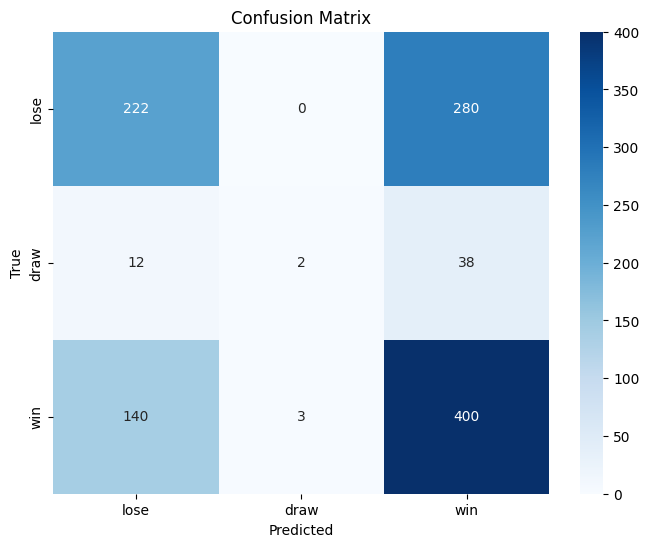

In [67]:
model_xgb = XGBClassifier(**XGB_params)
model_xgb.fit(X_train, y_train)
y_pred = model_xgb.predict(X_test)
plot_confusion_matrix(y_test, y_pred, ["lose","draw","win"])

In [68]:
model_test(model_xgb, blitz.drop("i_won",axis=1), blitz["i_won"], bullet.drop("i_won", axis=1), bullet["i_won"], n=5)

{'Train': 0.6420863238857135,
 'Test': 0.5445113433111853,
 'Test_Final': 0.5523242302925127}

# LogisticRegression

In [69]:
LogisticRegression_params = final_res["blitz"]['Logistic Regression']["Best Estimators"]
LR = linear_model.LogisticRegression(**LogisticRegression_params)
model_test(LR, blitz.drop("i_won",axis=1), blitz["i_won"], bullet.drop("i_won", axis=1), bullet["i_won"], n=10)

D:\LichessData\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\LichessData\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check

{'Train': 0.5377653389201491,
 'Test': 0.530366582713041,
 'Test_Final': 0.5570468837840703}

# To Do -> find and gridsearch one best model

# Some basic NN

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
Train = pd.concat([blitz, bullet])
Test = pd.concat([rapid, classical])

X = Train.drop("i_won", axis=1)
y = Train["i_won"]

X_F = Test.drop(["i_won"], axis=1)
y_F = Test["i_won"]

# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)
# X_F = scaler.transform(X_F)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 8)
X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')

X_test = np.asarray(X_test).astype('float32')
y_test = np.asarray(y_test).astype('float32')

X_F = np.asarray(X_F).astype('float32')
y_F = np.asarray(y_F).astype('float32')


y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

In [ ]:

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X.shape[1],))) # Dodaj warstwę wejściową
model.add(Dense(256, activation='relu'))  # Dodaj warstwę ukrytą
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))  # Dodaj warstwę wyjściową z funkcją aktywacji softmax
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=110, batch_size=64, validation_data=(X_test, y_test))

In [ ]:
NN_pred = model.predict(X_test)
NN_pred_F = model.predict(X_F)
y_pred_nn = np.argmax(NN_pred, axis=1)
y_pred_nn_F = np.argmax(NN_pred_F, axis=1)
y_test = np.argmax(y_test, axis=1)

In [ ]:
f1_score(y_test, y_pred_nn, average='weighted')

In [ ]:
f1_score(y_F, y_pred_nn_F, average='weighted')

In [ ]:
plot_confusion_matrix(y_test, y_pred_nn, ["lose","draw","win"])

In [ ]:
plot_confusion_matrix(y_F, y_pred_nn_F, ["lose","draw","win"])

# data for visal

In [103]:
dfwiz.head(1)

,id,rated,variant,speed,createdAt,lastMoveAt,status,winner,moves,clock,movesperplayer,white_player_name,white_ranking,black_player_name,black_ranking,Gametime,timepermove,white_moves,black_moves,my_kingcastle,my_queencastle,enemy_kingcastle,enemy_queencastle,my_color,White_moves_before_castle,Black_moves_before_castle,my_moves_before_castle,enemy_moves_before_castle,open4,opens1,my_rank,i_won,enemy_rank,rank_difference,is_higher,rank_after_game,my_rank_diff
0,O83cQxfo,True,standard,blitz,2023-06-28 02:33:43.673000+02:00,2023-06-28 02:44:00.722000+02:00,outoftime,white,"[e4, e5, Nf3, Nc6, Bc4, Nf6, d4, exd4, e5, d5,...",300,70,EvilSaintPL,1753,Leosammie,1735,617.0,8.8,"[e4, Nf3, Bc4, d4, e5, exd6, O-O, Na3, Nb5, Nb...","[e5, Nc6, Nf6, exd4, d5, Qxd6, Be7, Bg4, Qd7, ...",1,0,0,0,1,6,71,0.06,1.0,e4 e5 Nf3 Nc6,White e4 e5 Nf3 Nc6,1753,1,1735,18,True,1753,0


In [104]:
dfwiz["i_won"].unique()

array([ 1, -1,  0], dtype=int64)

In [105]:
df.to_csv("../data/for_visaul3.csv")